# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Run a complete regression analysis using python

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [1]:
# Import needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
sns.set_style('darkgrid')
sns.set_context('talk')

In [3]:
# Combine all the functions created so far to run a complete regression experiment. 
# Define a function to calculate slope
def find_slope(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    mean_xy = np.mean(x * y)
    sq_of_mean_x = mean_x**2
    mean_of_x_sq = np.mean(x**2)
    return (mean_x * mean_y - mean_xy) / (sq_of_mean_x - mean_of_x_sq)

# Define a function to calculate y-intercept
def find_intercept(x, y):
    slope = find_slope(x, y)
    mean_y = np.mean(y)
    mean_x = np.mean(x)
    return mean_y - slope * mean_x

# Define a function to predict a y value for a given x
def predict_y(x, slope, intercept):
    return slope * x + intercept

# Define a function to find squared error
def sq_err(y_a, y_b):
    differences = []
    for i in range(len(y_a)):
        differences.append(y_a[i] - y_b[i])
    squared_diff = [x**2 for x in differences]
    sum_squares = sum(squared_diff)
    return sum_squares

# Define a function to find R^2
def r_squared(y_real, y_predicted):
    mean_y_real = np.full(len(y_real), np.mean(y_real))
    rss = sq_err(y_real, y_predicted)
    tss = sq_err(y_real, mean_y_real) 
    return 1 - rss / tss

# Produce an output similar to the one shown below. 

X = np.array([1,2,3,4,5,6,7,8,9,10], dtype=np.float64)
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)



In [4]:
slope = round(find_slope(X, Y), 2)
intercept = round(find_intercept(X, Y), 2)
y_predictions = []
for x in X:
    y_predictions.append(predict_y(x, slope, intercept))
r_2 = round(r_squared(Y, y_predictions), 2)

Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56 * X + 6.33


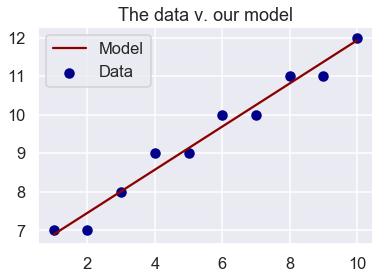

In [5]:
# Print regression diagnostic data
print('Basic Regression Diagnostics')
print('----------------------------')
print('Slope: {}'.format(slope))
print('Y-Intercept: {}'.format(intercept))
print('R-Squared: {}'.format(r_2))
print('----------------------------')
print('Model: Y = {} * X + {}'.format(slope, intercept))

# Plot data and model
plt.scatter(X, Y, color='darkblue', label='Data')
plt.plot(X, y_predictions, color='darkred', label='Model')
plt.legend()
plt.title('The data v. our model')
plt.show()

In [6]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

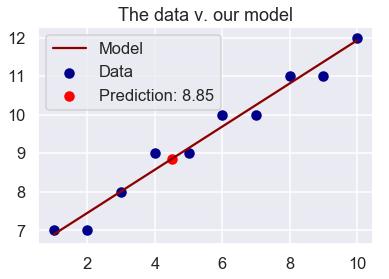

In [7]:
# Make prediction for x = 4.5 and visualize on the scatter plot
new_x = 4.5
pred_y_for_new_x = round(predict_y(new_x, slope, intercept), 2)

# Plot data and model
plt.scatter(X, Y, color='darkblue', label='Data')
plt.scatter(new_x, pred_y_for_new_x, color='red', label='Prediction: {}'.format(pred_y_for_new_x))
plt.plot(X, y_predictions, color='darkred', label='Model')
plt.legend()
plt.title('The data v. our model')
plt.show()

## Level up - Optional 
Load the "`heightWeight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

Basic Regression Diagnostics
----------------------------
Slope: 5.54
Y-Intercept: -204.48
R-Squared: 0.96
----------------------------
Model: Y = 5.54 * X + -204.48


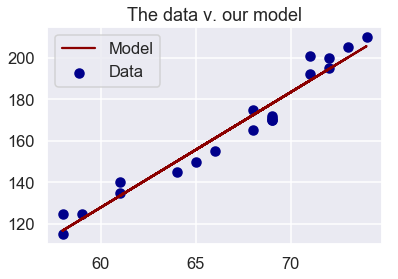

In [8]:
hw_data = pd.read_csv('heightWeight.csv')
heights = hw_data.height
weights = hw_data.weight

# Calculate values
slope_hw = round(find_slope(heights, weights), 2)
intercept_hw = round(find_intercept(heights, weights), 2)
y_predictions_hw = []
for x in heights:
    y_predictions_hw.append(predict_y(x, slope_hw, intercept_hw))
r_2_hw = round(r_squared(weights, y_predictions_hw), 2)

# Print regression diagnostic data
print('Basic Regression Diagnostics')
print('----------------------------')
print('Slope: {}'.format(slope_hw))
print('Y-Intercept: {}'.format(intercept_hw))
print('R-Squared: {}'.format(r_2_hw))
print('----------------------------')
print('Model: Y = {} * X + {}'.format(slope_hw, intercept_hw))

# Plot data and model
plt.scatter(heights, weights, color='darkblue', label='Data')
plt.plot(heights, y_predictions_hw, color='darkred', label='Model')
plt.legend()
plt.title('The data v. our model')
plt.show()

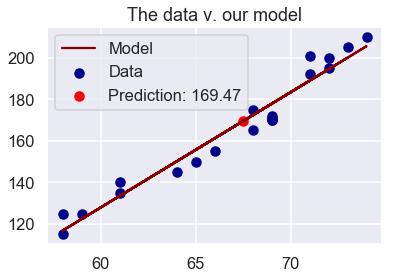

In [9]:
# Predict a new value
new_height = 67.5
pred_weight_for_new_height = predict_y(new_height, slope_hw, intercept_hw)

# Plot data and model
plt.scatter(heights, weights, color='darkblue', label='Data')
plt.scatter(new_height, pred_weight_for_new_height, color='red', label='Prediction: {}'.format(pred_weight_for_new_height))
plt.plot(heights, y_predictions_hw, color='darkred', label='Model')
plt.legend()
plt.title('The data v. our model')
plt.show()



## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use python's built-in modules to perform similar analyses with a much higher level of sophistication. 